In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score,f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sys import platform

labels={0:'clean',1:'high fry',2:'layered',3:'lowfry',4:'midfry',5:'no_vocals'}
# labels={0:'clean',1:'scream',2:'no vocal'}

In [9]:
n_class = '6class'

X_train=np.load(f'./resources/working_data/{n_class}_x_train-vggish.npy',allow_pickle=True)
X_test=np.load(f'./resources/working_data/{n_class}_x_test-vggish.npy',allow_pickle=True)
X_valid=np.load(f'./resources/working_data/{n_class}_x_valid-vggish.npy',allow_pickle=True)

y_train_hot=np.load(f'./resources/working_data/{n_class}_y_train-vggish.npy',allow_pickle=True)
y_test_hot=np.load(f'./resources/working_data/{n_class}_y_test-vggish.npy',allow_pickle=True)
y_valid_hot=np.load(f'./resources/working_data/{n_class}_y_valid-vggish.npy',allow_pickle=True)

y_train = np.argmax(y_train_hot,axis=1)
y_test = np.argmax(y_test_hot,axis=1)
y_valid = np.argmax(y_valid_hot,axis=1)
#df = pd.DataFrame(d,columns=feature_cols)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [10]:
def classwise_accuracy(cm):
    a=np.zeros(cm.shape)
    for i,x in enumerate(cm):
        a[i]=x/sum(x)
    return a

In [11]:
def eval_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    macro_acc = balanced_accuracy_score(y_test,y_pred)
    classwise_acc = classwise_accuracy(cm)
    return(cm,acc,f1,macro_acc,classwise_acc)

# kNN

Overall Accuracy Score: 0.4154929577464789
Macro Accuracy: 0.42229983219064593
Class-wise accuracy: 
[[0.8079096  0.02824859 0.05084746 0.05084746 0.01694915 0.04519774]
 [0.16071429 0.46428571 0.03571429 0.07142857 0.14285714 0.125     ]
 [0.35483871 0.29032258 0.08064516 0.10080645 0.13306452 0.04032258]
 [0.07462687 0.28358209 0.1641791  0.14925373 0.32835821 0.        ]
 [0.10897436 0.35897436 0.08333333 0.12820513 0.28846154 0.03205128]
 [0.06756757 0.12837838 0.00675676 0.02702703 0.02702703 0.74324324]]


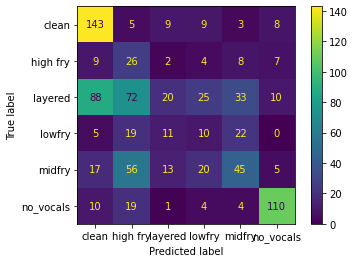

In [6]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,KNN_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# SVM

In [14]:
import matplotlib.pyplot as plt

Overall Accuracy Score: 0.45539906103286387
Macro Accuracy: 0.4591836003177328
Class-wise accuracy: 
[[0.84180791 0.02824859 0.03954802 0.01694915 0.02824859 0.04519774]
 [0.08928571 0.46428571 0.08928571 0.03571429 0.17857143 0.14285714]
 [0.31451613 0.29032258 0.08870968 0.09677419 0.15322581 0.05645161]
 [0.02985075 0.2238806  0.08955224 0.1641791  0.49253731 0.        ]
 [0.12820513 0.30128205 0.08333333 0.07051282 0.37179487 0.04487179]
 [0.05405405 0.07432432 0.00675676 0.02027027 0.02027027 0.82432432]]
F1 score: 0.4013489207140873


[Text(0, 0, 'Sing'),
 Text(1, 0, 'High Fry Scream'),
 Text(2, 0, 'Layered Screams'),
 Text(3, 0, 'Low Fry Screams'),
 Text(4, 0, 'Mid Fry Screams'),
 Text(5, 0, 'No Vocal')]

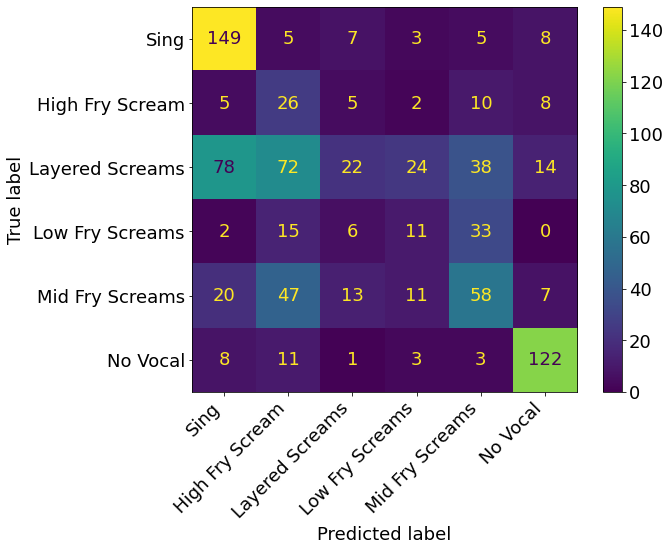

In [25]:
SVM_model = SVC(gamma='scale',C=1.0533, kernel='poly', degree=2,coef0=2.1,random_state=42)
SVM_model.fit(X_train, y_train)

SVM_prediction = SVM_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,SVM_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
print(f"F1 score: {f1}")
l=labels.values()
# ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()
l=['Sing','High Fry Scream','Layered Screams', 'Low Fry Screams','Mid Fry Screams', 'No Vocal']
cm_classwise=np.array([[0.84180791, 0.02824859, 0.03954802, 0.01694915, 0.02824859, 0.04519774],
 [0.08928571, 0.46428571, 0.08928571, 0.03571429, 0.17857143, 0.14285714],
 [0.31451613, 0.29032258, 0.08870968, 0.09677419, 0.15322581, 0.05645161],
 [0.02985075, 0.2238806 , 0.08955224, 0.1641791 , 0.49253731, 0.        ],
 [0.12820513, 0.30128205, 0.08333333, 0.07051282, 0.37179487, 0.04487179],
 [0.05405405, 0.07432432, 0.00675676, 0.02027027, 0.02027027, 0.82432432]])
# fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l)
disp.plot(xticks_rotation=45)
plt.rcParams.update({'font.size': 18})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.tight_layout()
disp.ax_.set_xticklabels(l,ha='right')
# plt.savefig('/Users/vedant/Desktop/Programming/ScreamDetection/charts/svm-vggish-6class.pdf')

In [39]:
cm/cm.sum(axis=1)

array([[0.84953704, 0.10315789, 0.03571429],
       [0.17592593, 0.75578947, 0.08928571],
       [0.0625    , 0.07368421, 0.86160714]])

# RF

Overall Accuracy Score: 0.8191881918819188
Macro Accuracy: 0.8203617260744455
F1 score: 0.8200458870746504
Class-wise accuracy: 
[[0.83564815 0.13657407 0.02777778]
 [0.14315789 0.77052632 0.08631579]
 [0.05580357 0.08928571 0.85491071]]


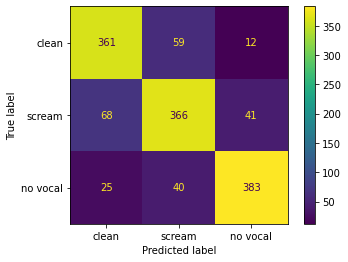

In [36]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,RF_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"F1 score: {f1}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

In [37]:
cm/cm.sum(axis=1)

array([[0.83564815, 0.12421053, 0.02678571],
       [0.15740741, 0.77052632, 0.09151786],
       [0.05787037, 0.08421053, 0.85491071]])